In [507]:
import numpy as np
import mlrose 
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Part 1. 

### 1.1 The travelling salesperson problem
The travelling salesperson problem (TSP) is a classic optimization problem where the goal is to determine the shortest tour of a collection of n “cities” (i.e. nodes), starting and ending in the same city and visiting all of the other cities exactly once. In such a situation, a solution can be represented by a vector of n integers, each in the range 0 to n-1, specifying the order in which the cities should be visited.

In [508]:
def make_dist_list(n):
    d_list = []
    for i in range(n):
        for j in range(i+1, n):
            d_list.append((i,j, random.random() * 100))
    return d_list

In [535]:
# create the list of problem of different size for testing of the algorithms
random.seed(7)
prs = []
for size in [10, 20, 40]:
    prs.append((size,make_dist_list(size)))
    
    
    

In [536]:
#try randomized hill climbing, simulated annealing, a genetic algorithm, MIMIC
res_hill_cl = []
res_sim_ann = []
res_g_a = []
res_mimic = []
for p in prs:
    # randomized hill climbing
    fitness_dists = mlrose.TravellingSales(distances = p[1])

    # Define optimization problem object
    problem_fit = mlrose.TSPOpt(length = p[0], fitness_fn = fitness_dists, maximize=False)
    t = time.time()
    res_hill_cl.append((mlrose.random_hill_climb(problem_fit,random_state = 2, curve=True, max_attempts=int(p[0]/4)), time.time()-t))

    #simulated annealing
    fitness_dists = mlrose.TravellingSales(distances = p[1])
    problem_fit = mlrose.TSPOpt(length = p[0], fitness_fn = fitness_dists, maximize=False)
    t = time.time()
    res_sim_ann.append((mlrose.simulated_annealing(problem_fit,random_state = 2, curve=True,max_attempts=int(p[0]/4)), time.time()-t))
    
    # genetic algorithm
    fitness_dists = mlrose.TravellingSales(distances = p[1])
    problem_fit = mlrose.TSPOpt(length = p[0], fitness_fn = fitness_dists, maximize=False)
    t = time.time()
    res_g_a.append((mlrose.genetic_alg(problem_fit,random_state = 2, curve=True,max_attempts=int(p[0]/4),pop_size=p[0]*10), time.time()-t))
    
    # MIMIC
    fitness_dists = mlrose.TravellingSales(distances = p[1])
    problem_fit = mlrose.TSPOpt(length = p[0], fitness_fn = fitness_dists, maximize=False)
    t = time.time()
    res_mimic.append((mlrose.mimic(problem_fit,random_state = 2, curve=True,max_attempts=int(p[0]/4),pop_size=p[0]*10), time.time()-t))
    
    

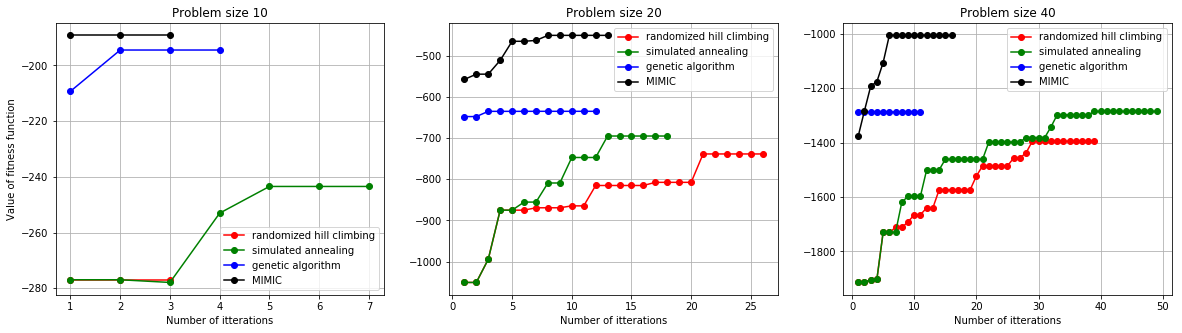

In [537]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_title("Problem size 10")
axes[0].set_xlabel("Number of itterations")
axes[0].set_ylabel("Value of fitness function")
axes[0].grid()   
axes[0].plot(list(range(1, 1+len(res_hill_cl[0][0][2]))), res_hill_cl[0][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[0].plot(list(range(1, 1+len(res_sim_ann[0][0][2]))), res_sim_ann[0][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[0].plot(list(range(1, 1+len(res_g_a[0][0][2]))), res_g_a[0][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[0].plot(list(range(1, 1+len(res_mimic[0][0][2]))), res_mimic[0][0][2], 'o-', color="k",
                 label="MIMIC")


axes[0].legend(loc="best")


axes[1].set_title("Problem size 20")
axes[1].set_xlabel("Number of itterations")
axes[1].grid()    
axes[1].plot(list(range(1, 1+len(res_hill_cl[1][0][2]))), res_hill_cl[1][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[1].plot(list(range(1, 1+len(res_sim_ann[1][0][2]))), res_sim_ann[1][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[1].plot(list(range(1, 1+len(res_g_a[1][0][2]))), res_g_a[1][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[1].plot(list(range(1, 1+len(res_mimic[1][0][2]))), res_mimic[1][0][2], 'o-', color="k",
                 label="MIMIC")
axes[1].legend(loc="best")

axes[2].set_title("Problem size 40")
axes[2].set_xlabel("Number of itterations")
axes[2].grid() 
axes[2].plot(list(range(1, 1+len(res_hill_cl[2][0][2]))), res_hill_cl[2][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[2].plot(list(range(1, 1+len(res_sim_ann[2][0][2]))), res_sim_ann[2][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[2].plot(list(range(1, 1+len(res_g_a[2][0][2]))), res_g_a[2][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[2].plot(list(range(1, 1+len(res_mimic[2][0][2]))), res_mimic[2][0][2], 'o-', color="k",
                 label="MIMIC")
axes[2].legend(loc="best")


In [538]:
for r in res_hill_cl:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  276.9661222028541 best time  0.006600856781005859
size 20 : best fitness  738.4159388669366 best time  0.024485111236572266
size 40 : best fitness  1395.5612919313626 best time  0.24870014190673828


In [539]:
for r in res_sim_ann:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  243.45514265488106 best time  0.0022521018981933594
size 20 : best fitness  694.8148936639858 best time  0.016815900802612305
size 40 : best fitness  1285.8812233052822 best time  0.2742750644683838


In [540]:
for r in res_g_a:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  194.4540524414705 best time  0.09698176383972168
size 20 : best fitness  634.721898595643 best time  1.872704029083252
size 40 : best fitness  1286.6402491486178 best time  22.725098848342896


In [541]:
for r in res_mimic:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  189.18544821760838 best time  0.43828797340393066
size 20 : best fitness  450.045863267336 best time  15.603107929229736
size 40 : best fitness  1006.1776359157138 best time  288.82564091682434


In [542]:
for r in res_mimic:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  189.18544821760838 best time  0.43828797340393066
size 20 : best fitness  450.045863267336 best time  15.603107929229736
size 40 : best fitness  1006.1776359157138 best time  288.82564091682434


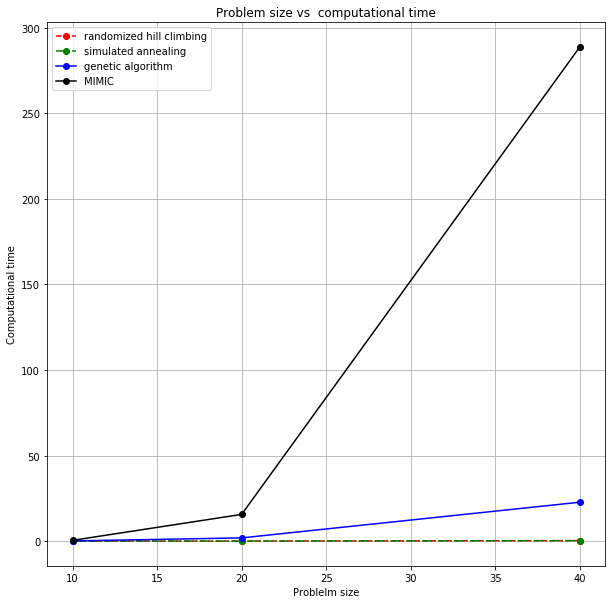

In [543]:
_, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.set_title("Problem size vs  computational time")
axes.set_xlabel("Problelm size")
axes.set_ylabel("Computational time")
axes.grid()   
axes.plot([10,20,40], [res_hill_cl[0][1],res_hill_cl[1][1],res_hill_cl[2][1]], 'o--', color="r",
                 label="randomized hill climbing")
axes.plot([10,20,40], [res_sim_ann[0][1],res_sim_ann[1][1],res_sim_ann[2][1]], 'o-.', color="g",
                 label="simulated annealing")
axes.plot([10,20,40], [res_g_a[0][1],res_g_a[1][1],res_g_a[2][1]], 'o-', color="b",
                 label="genetic algorithm")
axes.plot([10,20,40], [res_mimic[0][1],res_mimic[1][1],res_mimic[2][1]], 'o-', color="k",
                 label="MIMIC")


axes.legend(loc="best")

### Part 1.2. Find the binary string with maximum numer of alterating of "0" and "1"

In [527]:
#try randomized hill climbing, simulated annealing, a genetic algorithm, MIMIC
res_hill_cl2 = []
res_sim_ann2 = []
res_g_a2 = []
res_mimic2 = []

pr_size = [10,20,40]
for p in pr_size:
    # randomized hill climbing
    fitness = mlrose.FlipFlop()

    # Define optimization problem object
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)
    t = time.time()
    res_hill_cl2.append((mlrose.random_hill_climb(problem_fit,random_state = 2, curve=True, max_attempts=int(p*2)), time.time()-t))

    #simulated annealing
    fitness = mlrose.FlipFlop()
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)    
    t = time.time()
    res_sim_ann2.append((mlrose.simulated_annealing(problem_fit,random_state = 2, curve=True,max_attempts=int(p*2)), time.time()-t))
    
    # genetic algorithm
    fitness = mlrose.FlipFlop()
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)    
    t = time.time()
    res_g_a2.append((mlrose.genetic_alg(problem_fit,random_state = 2, curve=True,max_attempts=int(p),pop_size=p*10), time.time()-t))
    
    # MIMIC
    fitness = mlrose.FlipFlop()
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)    
    t = time.time()
    res_mimic2.append((mlrose.mimic(problem_fit,random_state = 2, curve=True,max_attempts=int(p),pop_size=p*10), time.time()-t))
    

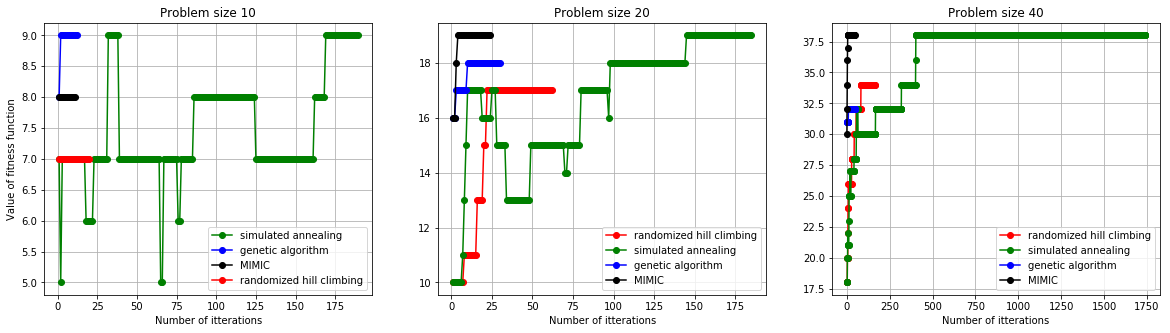

In [528]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_title("Problem size 10")
axes[0].set_xlabel("Number of itterations")
axes[0].set_ylabel("Value of fitness function")
axes[0].grid()   
axes[0].plot(list(range(1, 1+len(res_sim_ann2[0][0][2]))), res_sim_ann2[0][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[0].plot(list(range(1, 1+len(res_g_a2[0][0][2]))), res_g_a2[0][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[0].plot(list(range(1, 1+len(res_mimic2[0][0][2]))), res_mimic2[0][0][2], 'o-', color="k",
                 label="MIMIC")
axes[0].plot(list(range(1, 1+len(res_hill_cl2[0][0][2]))), res_hill_cl2[0][0][2], 'o-', color="r",
                 label="randomized hill climbing")


axes[0].legend(loc="best")


axes[1].set_title("Problem size 20")
axes[1].set_xlabel("Number of itterations")
axes[1].grid()    
axes[1].plot(list(range(1, 1+len(res_hill_cl2[1][0][2]))), res_hill_cl2[1][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[1].plot(list(range(1, 1+len(res_sim_ann2[1][0][2]))), res_sim_ann2[1][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[1].plot(list(range(1, 1+len(res_g_a2[1][0][2]))), res_g_a2[1][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[1].plot(list(range(1, 1+len(res_mimic2[1][0][2]))), res_mimic2[1][0][2], 'o-', color="k",
                 label="MIMIC")
axes[1].legend(loc="best")

axes[2].set_title("Problem size 40")
axes[2].set_xlabel("Number of itterations")
axes[2].grid() 
axes[2].plot(list(range(1, 1+len(res_hill_cl2[2][0][2]))), res_hill_cl2[2][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[2].plot(list(range(1, 1+len(res_sim_ann2[2][0][2]))), res_sim_ann2[2][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[2].plot(list(range(1, 1+len(res_g_a2[2][0][2]))), res_g_a2[2][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[2].plot(list(range(1, 1+len(res_mimic2[2][0][2]))), res_mimic2[2][0][2], 'o-', color="k",
                 label="MIMIC")
axes[2].legend(loc="best")





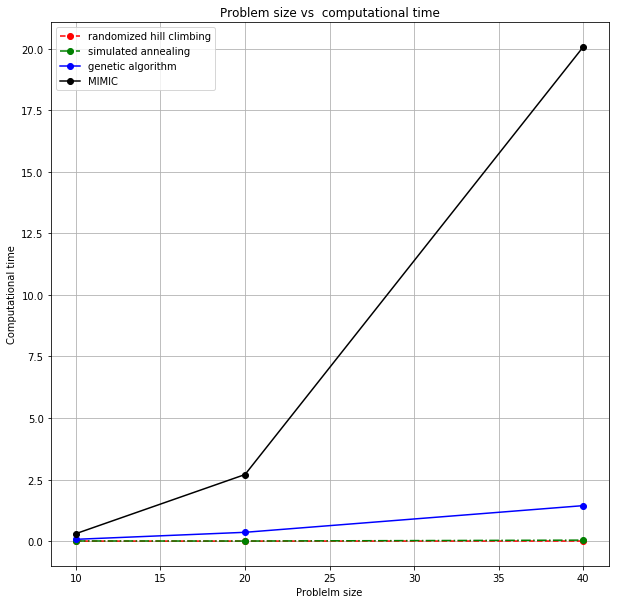

In [529]:
_, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.set_title("Problem size vs  computational time")
axes.set_xlabel("Problelm size")
axes.set_ylabel("Computational time")
axes.grid()   
axes.plot([10,20,40], [res_hill_cl2[0][1],res_hill_cl2[1][1],res_hill_cl2[2][1]], 'o--', color="r",
                 label="randomized hill climbing")
axes.plot([10,20,40], [res_sim_ann2[0][1],res_sim_ann2[1][1],res_sim_ann2[2][1]], 'o-.', color="g",
                 label="simulated annealing")
axes.plot([10,20,40], [res_g_a2[0][1],res_g_a2[1][1],res_g_a2[2][1]], 'o-', color="b",
                 label="genetic algorithm")
axes.plot([10,20,40], [res_mimic2[0][1],res_mimic2[1][1],res_mimic2[2][1]], 'o-', color="k",
                 label="MIMIC")


axes.legend(loc="best")

In [530]:
for r in res_hill_cl2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  7.0 best time  0.0005459785461425781
size 20 : best fitness  17.0 best time  0.0007753372192382812
size 40 : best fitness  34.0 best time  0.0035278797149658203


In [531]:
for r in res_sim_ann2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  9.0 best time  0.006005048751831055
size 20 : best fitness  19.0 best time  0.0029599666595458984
size 40 : best fitness  38.0 best time  0.03961181640625


In [532]:
for r in res_g_a2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  9.0 best time  0.07265281677246094
size 20 : best fitness  18.0 best time  0.35730719566345215
size 40 : best fitness  32.0 best time  1.4405927658081055


In [533]:
for r in res_mimic2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  8.0 best time  0.30364394187927246
size 20 : best fitness  19.0 best time  2.704214096069336
size 40 : best fitness  38.0 best time  20.073379039764404


### Part 1.3 Product of Sums of Consecutive Ones (Generic Alg)

We want to find the binary string to maximize product of sums of consecutive ones. For example: 1010 = 1*1 = 1, but 1101 = 2*1=2

In [509]:
# custom fitness function
def pr_of_cons_ones(state):
    my_ints = [0]
    last = 0
    for s in state:
        if s == 1:
            if last == 1:
                my_ints[-1] +=1
            else:
                my_ints.append(1)
            last = 1
        else:
            last = 0
    if sum(my_ints) == 0:
        return 0
    else:
        res = 1
        for i in my_ints:
            if i != 0:
                res *=i
        return res


In [510]:
pr_of_cons_ones([0,1,1,1,0,1,1,1,1,0,0,0])

12

In [511]:
#try randomized hill climbing, simulated annealing, a genetic algorithm, MIMIC
res_hill_cl2 = []
res_sim_ann2 = []
res_g_a2 = []
res_mimic2 = []

pr_size = [10,20,40]
for p in pr_size:
    # randomized hill climbing
    fitness = mlrose.CustomFitness(pr_of_cons_ones)

    # Define optimization problem object
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)
    t = time.time()
    res_hill_cl2.append((mlrose.random_hill_climb(problem_fit,random_state = 2, curve=True, max_attempts=int(p*2)), time.time()-t))

    #simulated annealing
    fitness = mlrose.CustomFitness(pr_of_cons_ones)
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)    
    t = time.time()
    res_sim_ann2.append((mlrose.simulated_annealing(problem_fit,random_state = 2, curve=True,max_attempts=int(p*2)), time.time()-t))
    
    # genetic algorithm
    fitness = mlrose.CustomFitness(pr_of_cons_ones)
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)    
    t = time.time()
    res_g_a2.append((mlrose.genetic_alg(problem_fit,random_state = 2, curve=True,max_attempts=int(p),pop_size=p*10,mutation_prob=0.01), time.time()-t))
    
    # MIMIC
    fitness = mlrose.CustomFitness(pr_of_cons_ones)
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)    
    t = time.time()
    res_mimic2.append((mlrose.mimic(problem_fit,random_state = 2, curve=True,max_attempts=int(p),pop_size=p*10), time.time()-t))
    
    

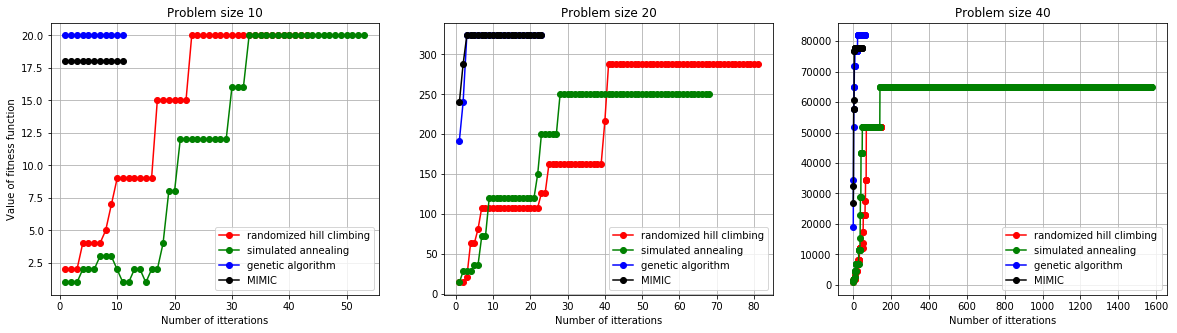

In [512]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_title("Problem size 10")
axes[0].set_xlabel("Number of itterations")
axes[0].set_ylabel("Value of fitness function")
axes[0].grid()   
axes[0].plot(list(range(1, 1+len(res_hill_cl2[0][0][2]))), res_hill_cl2[0][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[0].plot(list(range(1, 1+len(res_sim_ann2[0][0][2]))), res_sim_ann2[0][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[0].plot(list(range(1, 1+len(res_g_a2[0][0][2]))), res_g_a2[0][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[0].plot(list(range(1, 1+len(res_mimic2[0][0][2]))), res_mimic2[0][0][2], 'o-', color="k",
                 label="MIMIC")


axes[0].legend(loc="best")


axes[1].set_title("Problem size 20")
axes[1].set_xlabel("Number of itterations")
axes[1].grid()    
axes[1].plot(list(range(1, 1+len(res_hill_cl2[1][0][2]))), res_hill_cl2[1][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[1].plot(list(range(1, 1+len(res_sim_ann2[1][0][2]))), res_sim_ann2[1][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[1].plot(list(range(1, 1+len(res_g_a2[1][0][2]))), res_g_a2[1][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[1].plot(list(range(1, 1+len(res_mimic2[1][0][2]))), res_mimic2[1][0][2], 'o-', color="k",
                 label="MIMIC")
axes[1].legend(loc="best")

axes[2].set_title("Problem size 40")
axes[2].set_xlabel("Number of itterations")
axes[2].grid() 
axes[2].plot(list(range(1, 1+len(res_hill_cl2[2][0][2]))), res_hill_cl2[2][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[2].plot(list(range(1, 1+len(res_sim_ann2[2][0][2]))), res_sim_ann2[2][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[2].plot(list(range(1, 1+len(res_g_a2[2][0][2]))), res_g_a2[2][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[2].plot(list(range(1, 1+len(res_mimic2[2][0][2]))), res_mimic2[2][0][2], 'o-', color="k",
                 label="MIMIC")
axes[2].legend(loc="best")





In [518]:
# randomized hill clambing
print("size 10: best fitness: ", res_hill_cl2[0][0][1], "time: ", res_hill_cl2[0][1])
print("size 20: best fitness: ", res_hill_cl2[1][0][1], "time: ", res_hill_cl2[1][1])
print("size 40: best fitness: ", res_hill_cl2[2][0][1], "time: ", res_hill_cl2[2][1])

size 10: best fitness:  20.0 time:  0.017993927001953125
size 20: best fitness:  288.0 time:  0.0020978450775146484
size 40: best fitness:  51840.0 time:  0.003020048141479492


In [519]:
# simulated annealing
print("size 10: best fitness: ", res_sim_ann2[0][0][1], "time: ", res_sim_ann2[0][1])
print("size 20: best fitness: ", res_sim_ann2[1][0][1], "time: ", res_sim_ann2[1][1])
print("size 40: best fitness: ", res_sim_ann2[2][0][1], "time: ", res_sim_ann2[2][1])

size 10: best fitness:  20.0 time:  0.002557992935180664
size 20: best fitness:  250.0 time:  0.001264810562133789
size 40: best fitness:  64800.0 time:  0.03478813171386719


In [520]:
# generic
print("size 10: best fitness: ", res_g_a2[0][0][1], "time: ", res_g_a2[0][1])
print("size 20: best fitness: ", res_g_a2[1][0][1], "time: ", res_g_a2[1][1])
print("size 40: best fitness: ", res_g_a2[2][0][1], "time: ", res_g_a2[2][1])

size 10: best fitness:  20.0 time:  0.08163094520568848
size 20: best fitness:  324.0 time:  0.2677958011627197
size 40: best fitness:  81920.0 time:  1.5787272453308105


In [521]:
# mimic
print("size 10: best fitness: ", res_mimic2[0][0][1], "time: ", res_mimic2[0][1])
print("size 20: best fitness: ", res_mimic2[1][0][1], "time: ", res_mimic2[1][1])
print("size 40: best fitness: ", res_mimic2[2][0][1], "time: ", res_mimic2[2][1])

size 10: best fitness:  18.0 time:  0.430941104888916
size 20: best fitness:  324.0 time:  2.385948896408081
size 40: best fitness:  77760.0 time:  19.19727897644043


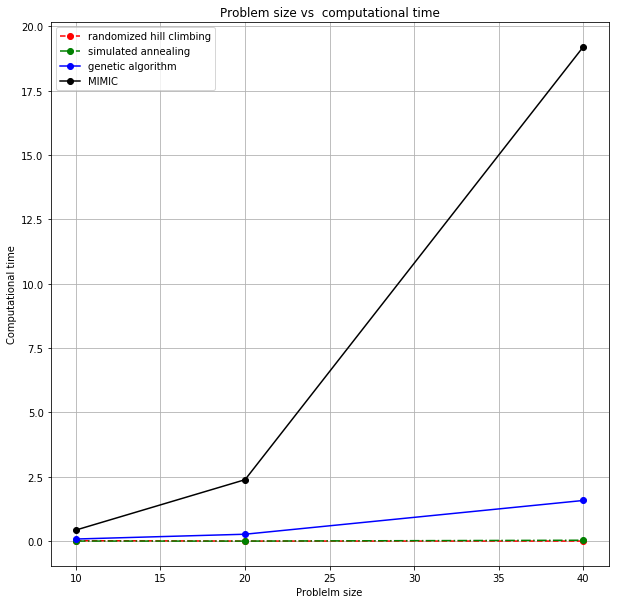

In [522]:
_, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.set_title("Problem size vs  computational time")
axes.set_xlabel("Problelm size")
axes.set_ylabel("Computational time")
axes.grid()   
axes.plot([10,20,40], [res_hill_cl2[0][1],res_hill_cl2[1][1],res_hill_cl2[2][1]], 'o--', color="r",
                 label="randomized hill climbing")
axes.plot([10,20,40], [res_sim_ann2[0][1],res_sim_ann2[1][1],res_sim_ann2[2][1]], 'o-.', color="g",
                 label="simulated annealing")
axes.plot([10,20,40], [res_g_a2[0][1],res_g_a2[1][1],res_g_a2[2][1]], 'o-', color="b",
                 label="genetic algorithm")
axes.plot([10,20,40], [res_mimic2[0][1],res_mimic2[1][1],res_mimic2[2][1]], 'o-', color="k",
                 label="MIMIC")


axes.legend(loc="best")

In [254]:
for r in res_sim_ann2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  20.0 best time  0.0018630027770996094
size 20 : best fitness  250.0 best time  0.0018281936645507812
size 40 : best fitness  64800.0 best time  0.035195112228393555


In [255]:
for r in res_sim_ann2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  20.0 best time  0.0018630027770996094
size 20 : best fitness  250.0 best time  0.0018281936645507812
size 40 : best fitness  64800.0 best time  0.035195112228393555


In [256]:
for r in res_g_a2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  20.0 best time  0.06410908699035645
size 20 : best fitness  324.0 best time  0.2508821487426758
size 40 : best fitness  81920.0 best time  1.6261577606201172


In [257]:
for r in res_mimic2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  18.0 best time  0.2864711284637451
size 20 : best fitness  324.0 best time  2.3470089435577393
size 40 : best fitness  77760.0 best time  19.86029291152954


Hill climbing attempts to find an optimal solution by following the gradient of the error function. It is prone to finding locally optimal solutions rather than globally optional solutions. On some error surfaces, the error function is not well behaved and so it will not work well.

Simulated annealing is modeled after a physical process when has a better chance of finding a near optimal global solution. In the beginning major jumps can occur in the search, but as the search progresses, smaller and smaller jumps are made. If “cooled” sufficiently slowly, that has a very good chance of finding an optimal solution.

If the problem has only one optimal solution ( Unimodal) then, SA and GA can be applied. If the problem has more than one optimal solution, GA will find solutions better than SA

## Part 2

In [260]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [261]:
# I used this model: https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# This model optimizes the log-loss function 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [262]:
from imblearn.under_sampling import RandomUnderSampler

In [263]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [544]:
# we will take train dataset from Kaggle and split it into train/ test (we cannot use test dataset from Kaggle
# since it has no labels)
all_data = pd.read_csv("tweets.csv")

In [545]:
all_data = all_data.fillna("")

# let's append keyword and lockation to the text:
def concat(a, b, c):
    return a + " " + b + " " + c

all_data['full_text'] = all_data.apply(lambda x: concat(x['keyword'], x['location'], x['text']), axis=1)
all_data = all_data.sample(frac=1)

# this function was taken from https://www.kaggle.com/adinishad/nlp-80-accuracy
def clean_data(my_text):
    # Replace email addresses with 'email'
    processed = my_text.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
    processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    processed = processed.str.replace(r'£|\$', 'moneysymb')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumbr')

    # Replace numbers with 'numbr'
    processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    processed = processed.str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    processed = processed.str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    processed = processed.str.replace(r'^\s+|\s+?$', '')

    # change words to lower case - Hello, HELLO, hello are all the same word
    processed = processed.str.lower()
    
    # remove stop words
    stop_words = set(stopwords.words("english"))
    processed = processed.apply(lambda x:" ".join(term for term in word_tokenize(x) if term not in stop_words))
    
    # stemming
    ps = PorterStemmer()
    processed = processed.apply(lambda x:" ".join([ps.stem(word) for word in x.split()]))
    
    # lemmatization
    wl = WordNetLemmatizer()
    processed = processed.apply(lambda x:" ".join([wl.lemmatize(word) for word in x.split()]))
    
    
    return processed

all_data_clean = clean_data(all_data["full_text"])

In [546]:
all_data["clean_text"] = all_data_clean

seed = 7

X = all_data.clean_text
y = all_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [547]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=300) # limit number of features to avoid overfitting
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [548]:
X_train.shape

(6090, 300)

In [549]:
y_train.shape

(6090,)

In [550]:
X_test.shape

(1523, 300)

In [551]:
# it is recomended to use scaled data for mlrose. I will use the scaled data for NN with original alrogithm and 
# for RO algorithms. I aslo found that mlrose random optimization works very bad when we have unbalanced data,
# thus, I will use downsampling to have the same number of positive and negative samples in the training set

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train.todense())
X_test_scaled = scaler.transform(X_test.todense())

y_train = y_train.values
y_test = y_test.values


rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_train_scaled, y_train)

In [552]:
X_rus.shape

(5194, 300)

### Original NN

In [277]:
layer_1 = [2, 3, 4, 5]
layer_2 = [2, 3, 4, 5]

for i in layer_1:
    for j in layer_2:
        #hidden_layer_sizes:  The ith element represents the number of neurons in the ith hidden layer.
        clf = MLPClassifier(solver='sgd', alpha=0, hidden_layer_sizes=(i, j), random_state=1) 
        scores = cross_val_score(clf, X_rus, y_rus, cv=5, scoring='accuracy')
        print(" layer_1: ", i, "layer_2: ", j,  " accuracy: ", np.median(scores))

 layer_1:  2 layer_2:  2  accuracy:  0.7247619047619047
 layer_1:  2 layer_2:  3  accuracy:  0.56
 layer_1:  2 layer_2:  4  accuracy:  0.700952380952381
 layer_1:  2 layer_2:  5  accuracy:  0.5
 layer_1:  3 layer_2:  2  accuracy:  0.5
 layer_1:  3 layer_2:  3  accuracy:  0.5
 layer_1:  3 layer_2:  4  accuracy:  0.49334600760456276
 layer_1:  3 layer_2:  5  accuracy:  0.5161596958174905
 layer_1:  4 layer_2:  2  accuracy:  0.5237642585551331
 layer_1:  4 layer_2:  3  accuracy:  0.5114068441064639
 layer_1:  4 layer_2:  4  accuracy:  0.723384030418251
 layer_1:  4 layer_2:  5  accuracy:  0.5180608365019012
 layer_1:  5 layer_2:  2  accuracy:  0.5
 layer_1:  5 layer_2:  3  accuracy:  0.6685714285714286
 layer_1:  5 layer_2:  4  accuracy:  0.52
 layer_1:  5 layer_2:  5  accuracy:  0.6673003802281369


In [278]:
# predict on the test data using the best parameters
clf = MLPClassifier(solver='sgd', alpha=0, hidden_layer_sizes=(2,2), random_state=1) 
clf.fit(X_rus, y_rus)
print("Training accuracy: ", accuracy_score(y_rus, clf.predict(X_rus)))
pr = clf.predict(X_test)
print("Testing accuracy: ", accuracy_score(y_test, pr))

Training accuracy:  0.758751902587519
Testing accuracy:  0.7347340774786605


In [556]:
start_train = time.time()
nn_model1 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='gradient_descent',
                                             max_iters=2500,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=0.001,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model1.fit(X_rus, y_rus)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model1.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  23.481786012649536
0.7266076241817482
0.7130663164806303


(Text(0.5, 0, 'Number of itterations'),
 Text(0, 0.5, 'Log loss'),
 <matplotlib.legend.Legend at 0x1a52fe2a90>)

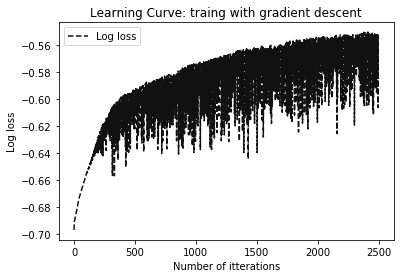

In [557]:
plt.plot(nn_model1.fitness_curve, '--', color="#111111",  label="Log loss")
plt.title("Learning Curve: traing with gradient descent")
plt.xlabel("Number of itterations"), plt.ylabel("Log loss"), plt.legend(loc="best")

### NN with RO: randomized hill climbing

In [562]:
start_train = time.time()
nn_model2_1 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='random_hill_climb',
                                             max_iters=20000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=0.1,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model2_1.fit(X_rus, y_rus)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model2_1.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model2_1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  112.78609895706177
0.7566422795533307
0.7334208798424163


In [563]:
start_train = time.time()
nn_model2_2 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='random_hill_climb',
                                             max_iters=20000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=1,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model2_2.fit(X_rus, y_rus)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model2_2.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model2_2.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  47.81074786186218
0.7826338082402773
0.7137229152987524


In [564]:
start_train = time.time()
nn_model2_3 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='random_hill_climb',
                                             max_iters=20000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=10,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model2_3.fit(X_rus, y_rus)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model2_3.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model2_3.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  11.95196795463562
0.7083172891798228
0.7084701247537755


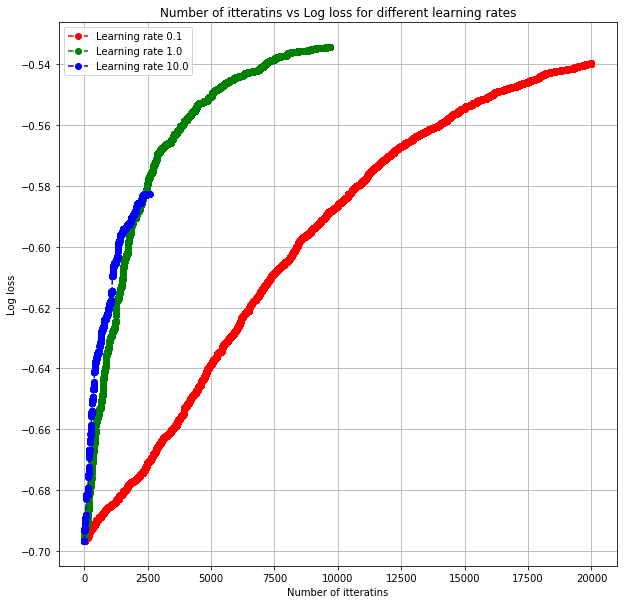

In [566]:
_, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.set_title("Number of itteratins vs Log loss for different learning rates")
axes.set_xlabel("Number of itteratins")
axes.set_ylabel("Log loss")
axes.grid()   
axes.plot(nn_model2_1.fitness_curve, 'o--', color="r",
                 label="Learning rate 0.1")
axes.plot(nn_model2_2.fitness_curve, 'o--', color="g",
                 label="Learning rate 1.0")
axes.plot(nn_model2_3.fitness_curve, 'o--', color="b",
                 label="Learning rate 10.0")

axes.legend(loc="best")

### NN with RO: simulated_annealing

In [577]:
random.seed(7)
init_weights=np.random.uniform(-0.2, 0.2, 608)
start_train = time.time()
nn_model3_1 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='simulated_annealing',
                                             max_iters=2000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=0.1,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model3_1.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model3_1.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3_1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  16.773858785629272
0.5017327685791297
0.5147734734077478


In [578]:
random.seed(7)
init_weights=np.random.uniform(-0.2, 0.2, 608)
start_train = time.time()
nn_model3_2 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='simulated_annealing',
                                             max_iters=2000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=1.0,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model3_2.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model3_2.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3_2.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  16.40543222427368
0.5
0.5574523965856861


In [588]:
random.seed(7)
init_weights=np.random.uniform(-0.2, 0.2, 608)
start_train = time.time()
nn_model3_5 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='simulated_annealing',
                                             max_iters=2000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=5.0,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model3_5.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model3_5.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3_5.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  17.694802045822144
0.5
0.5574523965856861


In [579]:
random.seed(7)
init_weights=np.random.uniform(-0.2, 0.2, 608)
start_train = time.time()
nn_model3_3 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='simulated_annealing',
                                             max_iters=2000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=10.0,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model3_3.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model3_3.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3_3.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  14.696557998657227
0.5656526761648055
0.5692711753118844


In [587]:
random.seed(7)
init_weights=np.random.uniform(-0.2, 0.2, 608)
start_train = time.time()
nn_model3_5 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='simulated_annealing',
                                             max_iters=2000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=15.0,
                                             early_stopping=True,
                                             clip_max=8,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model3_5.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model3_5.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3_5.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  16.913110971450806
0.5
0.5574523965856861


In [580]:
random.seed(7)
init_weights=np.random.uniform(-0.2, 0.2, 608)
start_train = time.time()
nn_model3_4 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='simulated_annealing',
                                             max_iters=2000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=40.0,
                                             early_stopping=True,
                                             clip_max=20,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model3_4.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model3_4.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3_4.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  15.996371030807495
0.5
0.5574523965856861


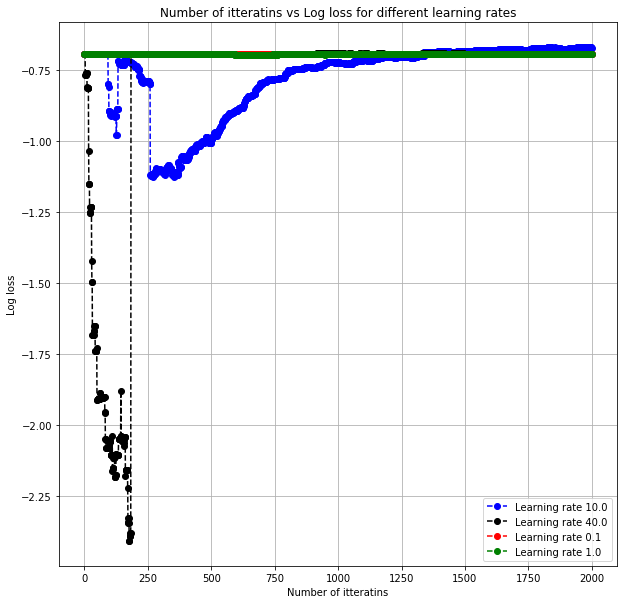

In [585]:
_, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.set_title("Number of itteratins vs Log loss for different learning rates")
axes.set_xlabel("Number of itteratins")
axes.set_ylabel("Log loss")
axes.grid()   
axes.plot(nn_model3_3.fitness_curve, 'o--', color="b",
                 label="Learning rate 10.0")
axes.plot(nn_model3_4.fitness_curve, 'o--', color="k",
                 label="Learning rate 40.0")
axes.plot(nn_model3_1.fitness_curve, 'o--', color="r",
                 label="Learning rate 0.1")
axes.plot(nn_model3_2.fitness_curve, 'o--', color="g",
                 label="Learning rate 1.0")

axes.legend(loc="best")

### Genetic algorithm

In [593]:
random.seed(7)
init_weights=np.random.uniform(-0.1, 0.1, 608)
start_train = time.time()
nn_model4_1 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='genetic_alg',
                                             max_iters=3000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=10,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             pop_size=400,mutation_prob=0.1,
                                             max_attempts=20)
nn_model4_1.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model4_1.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model4_1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  52.16614603996277
0.5
0.5574523965856861


In [602]:
random.seed(7)
init_weights=np.random.uniform(-0.1, 0.1, 608)
start_train = time.time()
nn_model4_2 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='genetic_alg',
                                             max_iters=3000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=10,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             pop_size=400,mutation_prob=0.01,
                                             max_attempts=20)
nn_model4_2.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model4_2.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model4_2.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  37.87684726715088
0.5215633423180593
0.5837163493105713


In [598]:
random.seed(7)
init_weights=np.random.uniform(-0.1, 0.1, 608)
start_train = time.time()
nn_model4_3 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='genetic_alg',
                                             max_iters=3000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=10,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             pop_size=400,mutation_prob=0.2,
                                             max_attempts=20)
nn_model4_3.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model4_3.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model4_3.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  40.377644062042236
0.49576434347323833
0.4852265265922521


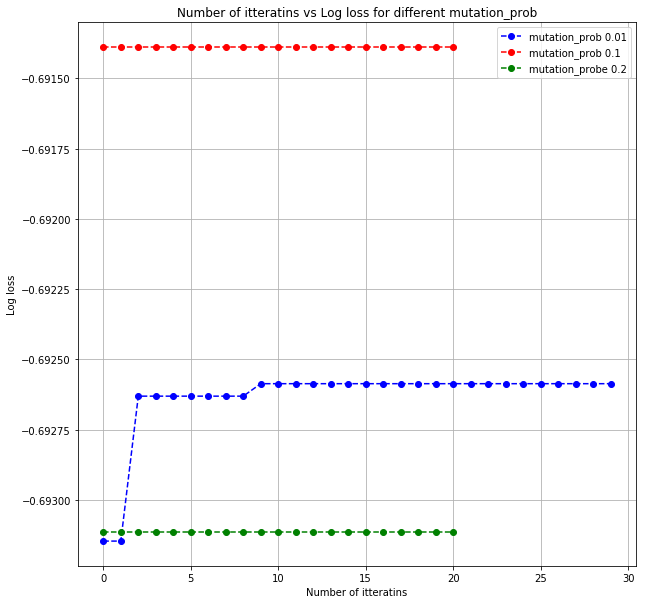

In [603]:
_, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.set_title("Number of itteratins vs Log loss for different mutation_prob")
axes.set_xlabel("Number of itteratins")
axes.set_ylabel("Log loss")
axes.grid()   
axes.plot(nn_model4_1.fitness_curve, 'o--', color="b",
                 label="mutation_prob 0.01")
axes.plot(nn_model4_2.fitness_curve, 'o--', color="r",
                 label="mutation_prob 0.1")
axes.plot(nn_model4_3.fitness_curve, 'o--', color="g",
                 label="mutation_probe 0.2")

axes.legend(loc="best")

In [604]:
random.seed(7)
init_weights=np.random.uniform(-0.1, 0.1, 608)
start_train = time.time()
nn_model4_2 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='genetic_alg',
                                             max_iters=3000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=1,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             pop_size=400,mutation_prob=0.01,
                                             max_attempts=20)
nn_model4_2.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model4_2.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model4_2.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  38.08645677566528
0.5215633423180593
0.5837163493105713


In [605]:
random.seed(7)
init_weights=np.random.uniform(-0.1, 0.1, 608)
start_train = time.time()
nn_model4_1 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='genetic_alg',
                                             max_iters=3000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=0.1,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             pop_size=400,mutation_prob=0.01,
                                             max_attempts=20)
nn_model4_1.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model4_1.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model4_1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  37.24597692489624
0.5215633423180593
0.5837163493105713


In [606]:
random.seed(7)
init_weights=np.random.uniform(-0.1, 0.1, 608)
start_train = time.time()
nn_model4_3 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='genetic_alg',
                                             max_iters=3000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=0.01,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             pop_size=400,mutation_prob=0.01,
                                             max_attempts=20)
nn_model4_3.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model4_3.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model4_3.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  36.37265992164612
0.5215633423180593
0.5837163493105713


In [607]:
random.seed(7)
init_weights=np.random.uniform(-0.1, 0.1, 608)
start_train = time.time()
nn_model4_4 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='genetic_alg',
                                             max_iters=3000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=5,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             pop_size=400,mutation_prob=0.01,
                                             max_attempts=20)
nn_model4_4.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model4_4.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model4_4.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  37.31328272819519
0.5215633423180593
0.5837163493105713


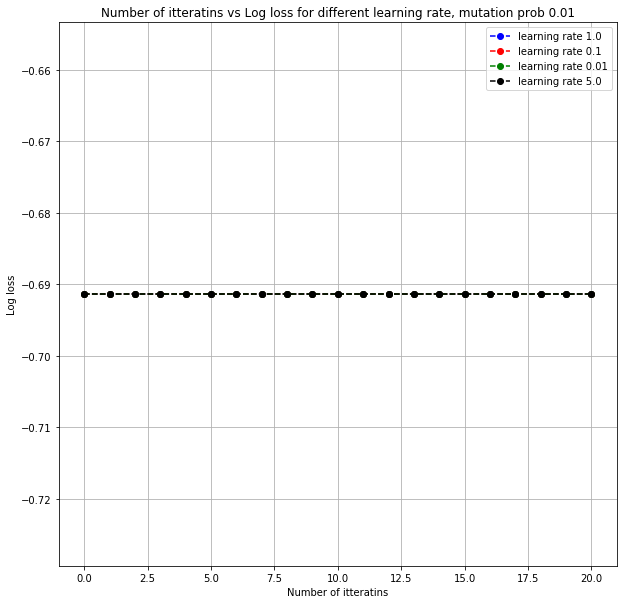

In [608]:
_, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.set_title("Number of itteratins vs Log loss for different learning rate, mutation prob 0.01")
axes.set_xlabel("Number of itteratins")
axes.set_ylabel("Log loss")
axes.grid()   
axes.plot(nn_model4_1.fitness_curve, 'o--', color="b",
                 label="learning rate 1.0")
axes.plot(nn_model4_2.fitness_curve, 'o--', color="r",
                 label="learning rate 0.1")
axes.plot(nn_model4_3.fitness_curve, 'o--', color="g",
                 label="learning rate 0.01")
axes.plot(nn_model4_4.fitness_curve, 'o--', color="k",
                 label="learning rate 5.0")

axes.legend(loc="best")